Importing all dependencies

In [50]:
#Import all dependencies which are libraries in this case that are necessary for the execution of this project
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import joblib
warnings.filterwarnings("ignore")




Data Loading

In [32]:
#Load the data
data = pd.read_csv('housing.csv')

In [33]:
# Convert the csv data into a dataframe",
df = pd.DataFrame(data)

Exploratory Data Analysis (EDA)

In [34]:
#View the data
df.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


Using a sample DataFrame with potential outliers.


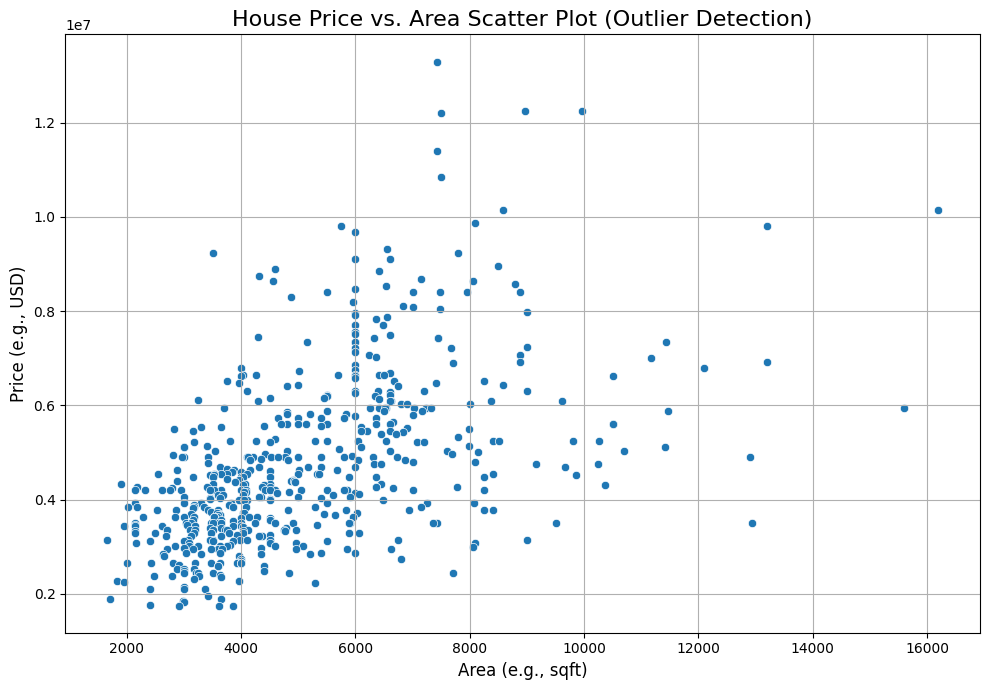


--- Interpretation Tip ---
Look for points that fall far away from the main cluster of data points.
These could be:
1. Points with extremely high or low 'area' values.
2. Points with extremely high or low 'price' values.
3. Points that deviate significantly from the general trend (e.g., a small area with a very high price, or a large area with a very low price).
These unusual points are your potential outliers.


In [35]:
#Checking for potential outliers in the dataset
print("Using a sample DataFrame with potential outliers.")


# Check if 'price' and 'area' columns exist in the DataFrame
if 'price' in df.columns and 'area' in df.columns:
    plt.figure(figsize=(10, 7)) # Adjust figure size for better visibility

    # Create the scatter plot
    sns.scatterplot(x='area', y='price', data=df)

    plt.title('House Price vs. Area Scatter Plot (Outlier Detection)', fontsize=16)
    plt.xlabel('Area (e.g., sqft)', fontsize=12)
    plt.ylabel('Price (e.g., USD)', fontsize=12)
    plt.grid(True) # Add a grid for easier reading
    plt.tight_layout() # Adjust layout to prevent labels from overlapping
    plt.show()

    print("\n--- Interpretation Tip ---")
    print("Look for points that fall far away from the main cluster of data points.")
    print("These could be:")
    print("1. Points with extremely high or low 'area' values.")
    print("2. Points with extremely high or low 'price' values.")
    print("3. Points that deviate significantly from the general trend (e.g., a small area with a very high price, or a large area with a very low price).")
    print("These unusual points are your potential outliers.")

else:
    print("\nError: 'price' and/or 'area' columns not found in your dataset.")
    print("Please ensure your DataFrame contains these columns with the exact names.")

In [36]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


Data Preprocesssing

In [37]:


#Applying label encoding to the categorical columns
yes_no_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

for col in yes_no_cols:
    df[col] = df[col].map({'yes': 1, 'no': 0})

#Encode furnishing status
furnishing_map = {
    'unfurnished': 0,
    'semi-furnished': 1,
    'furnished': 2
}
df['furnishingstatus'] = df['furnishingstatus'].map(furnishing_map)


In [38]:
#Checking for missing values
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [39]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

Model Training

In [40]:
#Defining the features and target variable
features = [
    'area', 'bedrooms', 'bathrooms', 'stories',
    'mainroad', 'guestroom', 'basement',
    'hotwaterheating', 'airconditioning',
    'parking', 'prefarea', 'furnishingstatus'
]

target = 'price'

In [41]:
#Split the data into features (X) and target variable (y), the independent and dependent variables"
X = df[features]
y = df[target]

In [42]:
#Scale numeric features
numeric_cols = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

In [43]:
#Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
#Define models to compare
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

In [48]:


# 9. Train, Predict, and Evaluate
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)
    
    results.append({
        "Model": name,
        "RMSE": round(rmse, 2),
        "R² Score": round(r2, 4)
    })


In [49]:
# 10. Display comparison
results_df = pd.DataFrame(results).sort_values(by="R² Score", ascending=False)
print(results_df)

               Model        RMSE  R² Score
5  Gradient Boosting  1300896.13    0.6652
0  Linear Regression  1331071.42    0.6495
2   Lasso Regression  1331071.56    0.6495
1   Ridge Regression  1332745.72    0.6486
4      Random Forest  1401369.34    0.6115
3      Decision Tree  1715038.20    0.4181


In [55]:
# Re-train on full data
final_model = GradientBoostingRegressor(random_state=42)
final_model.fit(X, y)

# Save model
joblib.dump(final_model, 'model.pkl')
joblib.dump(scaler, 'scaler.pkl')



['scaler.pkl']